In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
## load dataset
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


## problem statement
1. in dataset   the index_price represent measurre of relative changes ,consisting of a series of number arranged so we can compare the values for any two periods

2. we have 12 year details for interest_rate and unemployment_rate and we have to create a model which will be taking this two features values and predict the index_price as there is more than 1 independent features we use multiple linear regression

In [3]:
## droping Unnamed
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

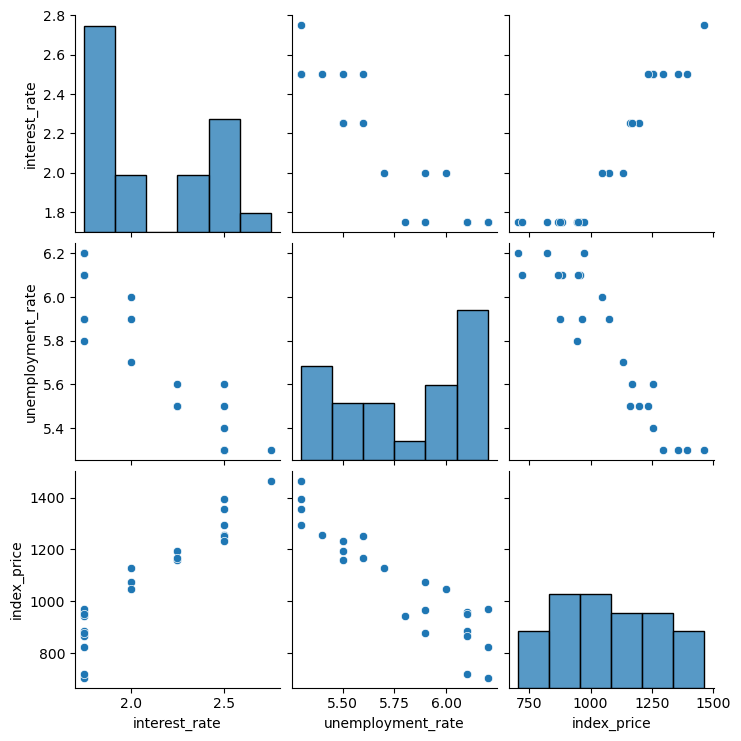

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


observations:
1. interest_rate vs index price has positive corr
2. unemployment_rate vs index_price has negative corr
3. interest_rate vs unemployment_rate has negative corr

Text(0, 0.5, 'unemployment rate')

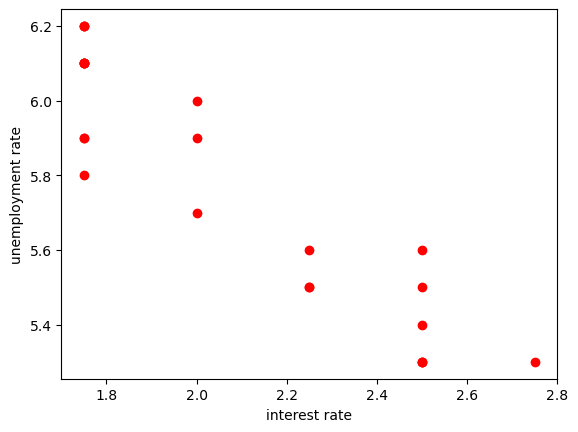

In [12]:
## visualizie the data point more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

observations: unemployment_rate and interest_rate inversly co-related

In [17]:
## independent and dependent feature
##X=df[['interest_rate','unemployment_rate']]
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [21]:
## train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

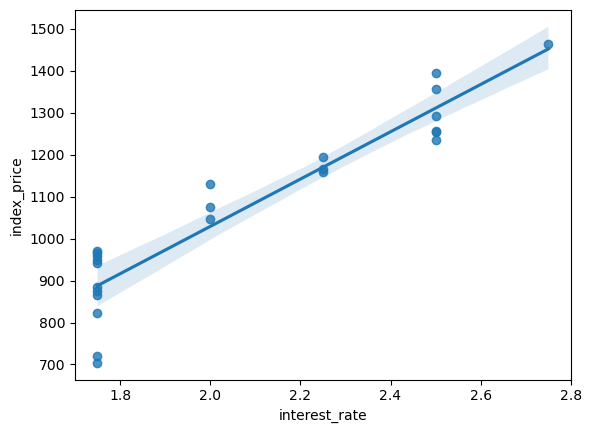

In [26]:
## regplot- plot data and linear regression model fit
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

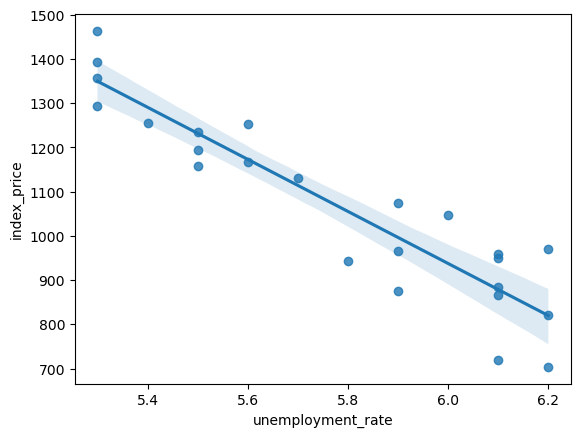

In [27]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

we can create it for more than 2 feature

## standarizations

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

## apply linear regression 

In [31]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [32]:
regression.fit(X_train,y_train)

LinearRegression()

sklearn.model_selection.cross_val_score = used form corss validations


In [33]:
## corss validations
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [35]:
np.mean(validation_score)

-5914.828180162388

In [36]:
## prediction
y_pred=regression.predict(X_test)

In [37]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [38]:
## performance metric
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [39]:
## r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457142


## assumptions

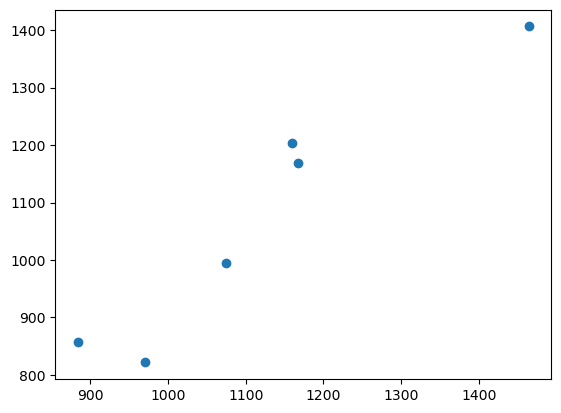

In [41]:
plt.scatter(y_test,y_pred)

model perform well as its linear regression


In [42]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


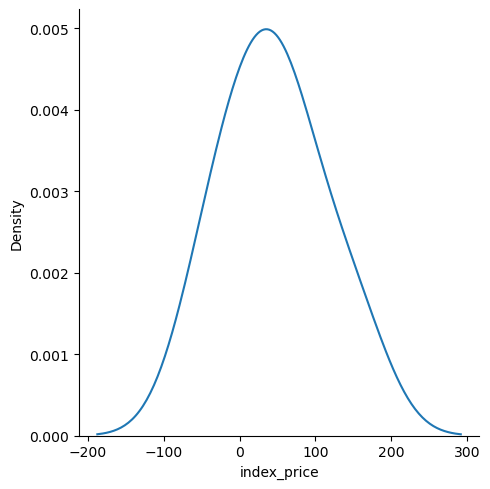

In [43]:
## plot the residuals
sns.displot(residuals,kind='kde')

as its normal distributions it mean model performance is good

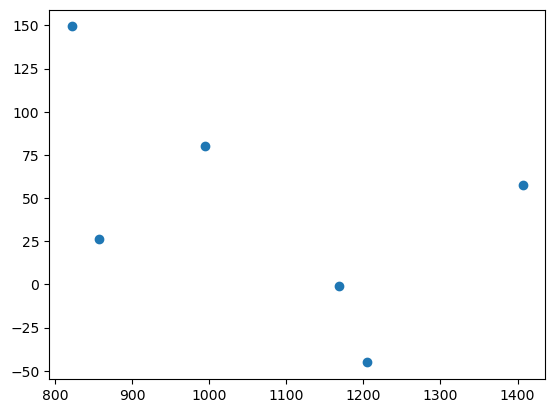

In [44]:
## scatter plot with respect prediction and residuals
plt.scatter(y_pred,residuals)


## linear regression using OLS

In [45]:
import statsmodels.api as sm

In [46]:
model=sm.OLS(y_train,X_train).fit()

In [47]:
model.summary()

c:\Users\chetan\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 25 Aug 2024   Prob (F-statistic):                       0.754
Time:                        19:08:20   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
print(regression.coef_)

[  88.27275507 -116.25716066]


as the coefficent from OLA and regession model is same 

## prediction for new data point

In [49]:
regression.predict(scaler.transform([[3,6]]))

c:\Users\chetan\miniconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1219.18863712])

it predicted the index_price =1219.188, for intrest rate =3,and unemployment rate =6